<a href="https://colab.research.google.com/github/skandan999/Stark/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [17]:
boston = load_boston()

In [18]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
features = pd.DataFrame(boston.data, columns= boston.feature_names)
target = pd.DataFrame(boston.target, columns = ['Target'])
data = pd.concat([features, target], axis=1)

In [22]:
data2 = data.corr('pearson')

In [23]:
abs(data2.loc['Target']).sort_values(ascending = False)

Target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [24]:
x = data['RM']
y = data['Target']

In [25]:
x=np.array(x/x.mean())
y=np.array(y/y.mean())

In [26]:
n = int(0.8*len(x))
x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]


In [ ]:
plt.plot(x_train, y_train, 'b.')

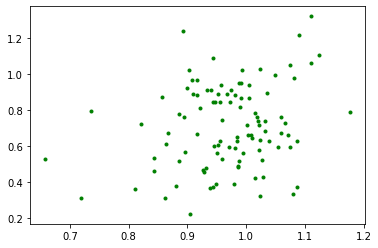

In [29]:
plt.plot(x_test,y_test, 'g.')

In [30]:
def hypothesis(a,b,x):
  return a*x + b

In [31]:
def error(a,b,x,y):
  e=0
  m=len(y)
  for i in range(m):
    e +=np.power((hypothesis(a,b,x[i])-y[i]),2)
  return (1/(2*m)) *e

In [32]:
def step_gradient(a,b,x,y,learning_rate):
  grad_a=0
  grad_b=0
  m=len(x)
  for i in range(m):
    grad_a += 1/m *(hypothesis(a,b,x[i])-y[i] *x[i])
    grad_b += 1/m *(hypothesis(a,b,x[i])-y[i] *x[i])
  a = a-(grad_a * learning_rate)
  b = b-(grad_b * learning_rate)
  return a,b


In [33]:
def descend(initial_a, initial_b, x,y,learning_rate, iterations):
  a = initial_a
  b= initial_b
  for i in range(iterations):
    e= error(a,b,x,y)
    if i % 1000 == 0:
      print(f"Error: {e}, a: {a}, b: {b}")
    a,b = step_gradient(a,b,x,y,learning_rate )
  return a,b

In [34]:
a = 0
b = 1
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,x_train, y_train, learning_rate, iterations)

Error: 0.08691047391394598, a: 0, b: 1
Error: 0.08316424452280848, a: 0.05821160600785213, b: 1.0582116060078528
Error: 0.08316424452764044, a: 0.05821160609840981, b: 1.0582116060984008
Error: 0.08316424452764044, a: 0.05821160609840981, b: 1.0582116060984008
Error: 0.08316424452764044, a: 0.05821160609840981, b: 1.0582116060984008
Error: 0.08316424452764044, a: 0.05821160609840981, b: 1.0582116060984008
Error: 0.08316424452764044, a: 0.05821160609840981, b: 1.0582116060984008
Error: 0.08316424452764044, a: 0.05821160609840981, b: 1.0582116060984008
Error: 0.08316424452764044, a: 0.05821160609840981, b: 1.0582116060984008
Error: 0.08316424452764044, a: 0.05821160609840981, b: 1.0582116060984008


In [35]:
print(error(a,b,x_train,y_train))
print(error(final_a, final_b , x_train, y_train))

0.08691047391394598
0.08316424452764044


In [37]:
print(error(final_a, final_b, x_test, y_test))


0.10759779851510295


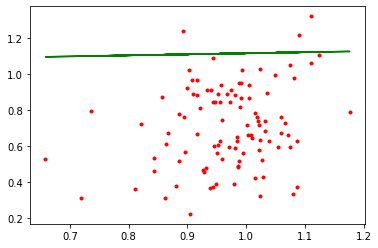

In [44]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a,final_b, x_test),'g')